<a href="https://colab.research.google.com/github/erikycd/Taller_visionM/blob/main/Stability_API_StableDif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Usando la API de Stability con Python
### Ejemplo extraido de: https://platform.stability.ai/docs/features

## Instalación rápida de las librerias de Stability SDK

In [ ]:
%pip install stability-sdk

##Definiendo mi API key

In [ ]:
import getpass, os

# Our Host URL should not be prepended with "https" nor should it have a trailing slash.
os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'

# Sign up for an account at the following link to get an API Key.
# https://platform.stability.ai/

# Click on the following link once you have created an account to be taken to your API Key.
# https://platform.stability.ai/account/keys

# Paste your API Key below after running this cell.

os.environ['STABILITY_KEY'] = getpass.getpass('Enter your API Key')

Enter your API Key··········


##Conectando mi llave

In [ ]:
import io
import os
import warnings

from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation

# Set up our connection to the API.
stability_api = client.StabilityInference(
    key = os.environ['STABILITY_KEY'], # API Key reference.
    verbose = True, # Print debug messages.
    engine = "stable-diffusion-xl-1024-v1-0", # Set the engine to use for generation.
    # Check out the following link for a list of available engines: https://platform.stability.ai/docs/features/api-parameters#engine
)

INFO:stability_sdk.client:Opening channel to grpc.stability.ai:443
INFO:stability_sdk.client:Channel opened to grpc.stability.ai:443


## Generando imagenes desde texto

In [ ]:
# Set up our initial generation parameters.
answers = stability_api.generate(
    prompt = "A photography of a forest with a lost dog walking in the center, natural ambient, realism",
    seed = 4253978046, # If a seed is provided, the resulting generated image will be deterministic.
                     # What this means is that as long as all generation parameters remain the same, you can always recall the same image simply by generating it again.
                     # Note: This isn't quite the case for Clip Guided generations, which we'll tackle in a future example notebook.
    steps = 50, # Amount of inference steps performed on image generation. Defaults to 30.
    cfg_scale = 8.0, # Influences how strongly your generation is guided to match your prompt.
                   # Setting this value higher increases the strength in which it tries to match your prompt.
                   # Defaults to 7.0 if not specified.
    width = 512, # Generation width, defaults to 512 if not included.
    height = 512, # Generation height, defaults to 512 if not included.
    samples = 1, # Number of images to generate, defaults to 1 if not included.
    sampler = generation.SAMPLER_K_DPMPP_2M # Choose which sampler we want to denoise our generation with.
                                                 # Defaults to k_dpmpp_2m if not specified. Clip Guidance only supports ancestral samplers.
                                                 # (Available Samplers: ddim, plms, k_euler, k_euler_ancestral, k_heun, k_dpm_2, k_dpm_2_ancestral, k_dpmpp_2s_ancestral, k_lms, k_dpmpp_2m, k_dpmpp_sde)
)


INFO:stability_sdk.client:Sending request.
INFO:stability_sdk.client:Got answer c2f5b96c-82b7-43a9-8ad3-d6065ef396ef with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS'] in 30.95s


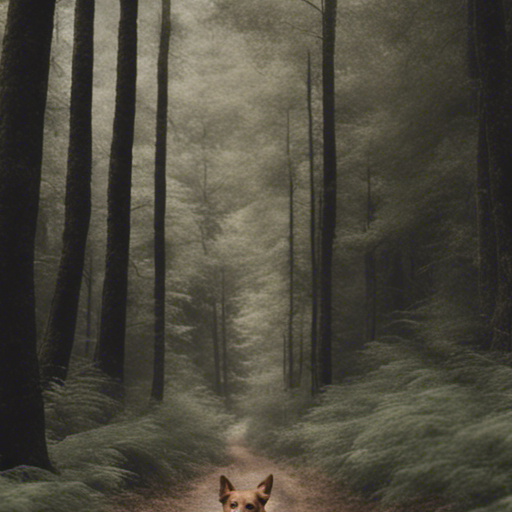

In [ ]:
# Set up our warning to print to the console if the adult content classifier is tripped.
# If adult content classifier is not tripped, save generated images.
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img = Image.open(io.BytesIO(artifact.binary))
            display(img)

In [ ]:
img.save('imagen_dog_2.png')

## Conectando mi API para generar variaciones de una imágen

In [ ]:
# Set up our initial generation parameters.
answers2 = stability_api.generate(
    prompt = "A crayon drawing of a forest with a lost cat walking in the center, natural ambient",
    init_image = img, # Assign our previously generated img as our Initial Image for transformation.
    start_schedule = 0.6, # Set the strength of our prompt in relation to our initial image.
    seed = 123463446, # If attempting to transform an image that was previously generated with our API,
                    # initial images benefit from having their own distinct seed rather than using the seed of the original image generation.
    steps = 50, # Amount of inference steps performed on image generation. Defaults to 30.
    cfg_scale = 8.0, # Influences how strongly your generation is guided to match your prompt.
                   # Setting this value higher increases the strength in which it tries to match your prompt.
                   # Defaults to 7.0 if not specified.
    width = 512, # Generation width, defaults to 512 if not included.
    height = 512, # Generation height, defaults to 512 if not included.
    sampler = generation.SAMPLER_K_DPMPP_2M # Choose which sampler we want to denoise our generation with.
                                                 # Defaults to k_dpmpp_2m if not specified. Clip Guidance only supports ancestral samplers.
                                                 # (Available Samplers: ddim, plms, k_euler, k_euler_ancestral, k_heun, k_dpm_2, k_dpm_2_ancestral, k_dpmpp_2s_ancestral, k_lms, k_dpmpp_2m, k_dpmpp_sde)
)


In [ ]:
# Set up our warning to print to the console if the adult content classifier is tripped.
# If adult content classifier is not tripped, save generated image.
for resp in answers2:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img2 = Image.open(io.BytesIO(artifact.binary))
            display(img2)

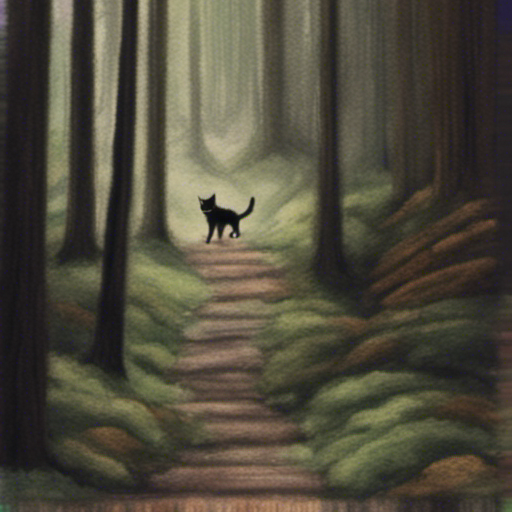

In [ ]:
display(img2)
img2.save(str(artifact.seed)+ "imagen_cat.png")